INF200 Lecture No 5
===================

***Hans Ekkehard Plesser, NMBU, 10 October 2022***

# Today's topics

* Representing data
    - Pandas series and dataframes
* Version control with Git and Gitlab

## Block & Partner Quiz

* Deadline extended until **Tuesday 11 Oct noon**
* Fill in even if you have not yet found a partner
* Find a partner asap and notify me by email

---
# Pandas series and dataframes


## Pandas 
- Powerful and widely popular package for data processing
- Developed by Wes McKinney since 2008
    - Originally geared towards applications in finance
- Resources
    - https://pandas.pydata.org
    - Chapter 12 in J.R. Johannsen's *Numerical Python*
    - [*Python for Data Analysis*](http://shop.oreilly.com/product/0636920023784.do) by Wes McKinney
- Focus on managing data
- Can be considered Python's answer to spreadsheets
- Similar to R's data frames
- Some support for data analysis and visualization

## Key concepts

- `Series`, roughly comparable to single columns in a spreadsheet
- `DataFrame`, roughly comparable to an entire table or spreadsheet
- Builds on NumPy, but
    - adds names to data
    - provides powerful high-level tools to work with tables

The remained of this lecture is based on Ch 12 of Johansson's *Numerical Python*.

Example data are result data at the district level of the Norwegian parliament elections 2021, downloaded from https://valgresultater.no/eksport-av-valgresultater?type=st&year=2021 on 30 September 2021.

## Series

- One-dimensional set of data
- Defined by passing an iterable of values

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
v = pd.Series([95609, 38779, 101439, 32584])
v

0     95609
1     38779
2    101439
3     32584
dtype: int64

- The left column shown here is the *index* of the series
    - Pandas automatically assigned index 0, 1, 2, 3 since we did not provide and index
- The right column are the *values* of the series
- We can access index and values:


In [3]:
v.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
v.values

array([ 95609,  38779, 101439,  32584])

- Note that values are stored as NumPy arrays internally (Python packages build on top of each other)
- We can assign a new index to provide more information
- We can also assign a name

In [5]:
v.index = ['A', 'FRP', 'H', 'SP']
v.name = 'Votes'
v

A       95609
FRP     38779
H      101439
SP      32584
Name: Votes, dtype: int64

- Much more informative!
- We could have done it in one step

In [6]:
v = pd.Series([95609, 38779, 101439, 32584],
              index=['A', 'FRP', 'H', 'SP'],
              name='Votes')
v

A       95609
FRP     38779
H      101439
SP      32584
Name: Votes, dtype: int64

- The data in this series i now self-documenting through the series name and index
- We can now access data conveniently
    - We can always use dictionary notation

In [7]:
v['A']

95609

- If a name is a valid Python name, we can also look it up as an attribute

In [8]:
v.H

101439

- We can even look up several entries at once
- The result is then a new series

In [9]:
v[['A', 'H']]

A     95609
H    101439
Name: Votes, dtype: int64

- And we can slice
    - Note that the last matching index *is included*

In [10]:
v[:'H']

A       95609
FRP     38779
H      101439
Name: Votes, dtype: int64

- We can do some data analysis

In [11]:
v.count(), v.sum(), v.mean(), v.median()

(4, 268411, 67102.75, 67194.0)

- We can get an overview easily

In [12]:
v.describe()

count         4.000000
mean      67102.750000
std       36447.968708
min       32584.000000
25%       37230.250000
50%       67194.000000
75%       97066.500000
max      101439.000000
Name: Votes, dtype: float64

- We can also plot the data in various ways
- Note that we call `plot` as a method of the `Series`

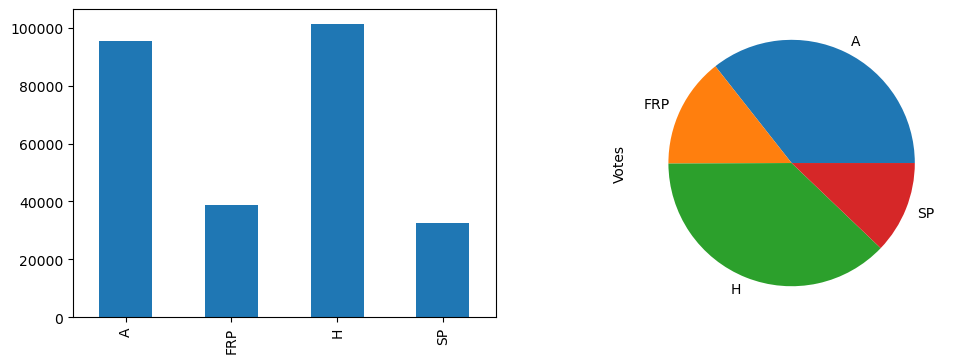

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
v.plot(ax=axes[0], kind='bar')
v.plot(ax=axes[1], kind='pie');

## DataFrame

- Two-dimensional data structure
- Consists of one more Series
- Main workhorse of Pandas
- Allows us to represent and work with annotated (self-documenting) data in table form
- DataFrame vs Spreadsheet (Excel & Co)
    - both organise data in tables
    - both allow complex operation on tables
    - DataFrame contains *only data*—*operations are separate*
    - Spreadsheet *combines operations and data*: much more difficult to debug!

### Constructing a DataFrame

- Simplest construction from 2D array

In [16]:
df = pd.DataFrame([[87158, 'Oslo'], 
                   [89342, 'Oslo'], 
                   [95609, 'Akershus'],
                   [101439, 'Akershus']])
df

0         1
0   87158      Oslo
1   89342      Oslo
2   95609  Akershus
3  101439  Akershus

- Jupyter neatly renders the DataFrame as table
- Pandas has automatically assigned numerical row index and column labels
- We can set them explictly post-construction or pass the information directly to the constructor

In [17]:
 df = pd.DataFrame([[87158, 'Oslo',], 
                    [89342, 'Oslo'], 
                    [95609, 'Akershus'],
                    [101439, 'Akershus']],
                   index=['A', 'H', 'A', 'H'],
                   columns=['Votes', 'District'])
df

Votes  District
A   87158      Oslo
H   89342      Oslo
A   95609  Akershus
H  101439  Akershus

- We can also pass a dictionary with one entry per column

In [18]:
df = pd.DataFrame({'Votes': [87158, 89342, 95609, 101439],
                   'District': ['Oslo', 'Oslo', 'Akershus', 'Akershus']},
                  index=['A', 'H', 'A', 'H'])
df

Votes  District
A   87158      Oslo
H   89342      Oslo
A   95609  Akershus
H  101439  Akershus

- Both approaches are not ideal, because we rely heavily on the fact that the three arrays are "in sync".
- Creating the DataFrame from records is safer

In [19]:
df = pd.DataFrame.from_records([{'District': 'Oslo', 'Party': 'A', 'Votes': 87158},
                                {'District': 'Oslo', 'Party': 'H', 'Votes': 89342},
                                {'District': 'Akershus', 'Party': 'A', 'Votes': 95609},
                                {'District': 'Akershus', 'Party': 'H', 'Votes': 101439}])
df

District Party   Votes
0      Oslo     A   87158
1      Oslo     H   89342
2  Akershus     A   95609
3  Akershus     H  101439

- We can then select one column as the index afterwards

In [20]:
df = df.set_index('Party')
df

District   Votes
Party                  
A          Oslo   87158
H          Oslo   89342
A      Akershus   95609
H      Akershus  101439

- We can select individual columns

In [21]:
df.Votes

Party
A     87158
H     89342
A     95609
H    101439
Name: Votes, dtype: int64

In [22]:
df['Votes']

Party
A     87158
H     89342
A     95609
H    101439
Name: Votes, dtype: int64

- We can select rows using `loc`
    - looks like a method, but used with brackets
    - `ix` is used in Johansson's book but is deprecated today
    

In [23]:
df.loc['A']

District  Votes
Party                 
A          Oslo  87158
A      Akershus  95609

- We can also combine row and column indexing

In [24]:
df.loc['A'].Votes

Party
A    87158
A    95609
Name: Votes, dtype: int64

In [25]:
df.loc['A', 'Votes']

Party
A    87158
A    95609
Name: Votes, dtype: int64

- We can obtain technical information about the dataframe

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to H
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   District  4 non-null      object
 1   Votes     4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


- And we can get a summary 

In [27]:
df.describe()

Votes
count       4.000000
mean    93387.000000
std      6453.279631
min     87158.000000
25%     88796.000000
50%     92475.500000
75%     97066.500000
max    101439.000000

- The summary does not contain the "District" column because that is not numerical

## Working with a large dataset: Complete election data

- Print the first few lines of the file

In [28]:
open('../l04/2021-09-30_party distribution_1_st_2021.csv', encoding='utf-8').readlines()[:10]

['Fylkenummer;Fylkenavn;Kommunenummer;Kommunenavn;Stemmekretsnummer;Stemmekretsnavn;Partikode;Partinavn;Oppslutning prosentvis;Antall stemmeberettigede;Antall forhåndsstemmer;Antall valgtingstemmer;Antall stemmer totalt;Endring % siste tilsvarende valg;Endring % siste ekvivalente valg;Antall mandater;Antall utjevningsmandater;\n',
 '01;Østfold;;;;;A;Arbeiderpartiet;30,47944;223945;24817;24528;49345;-1,58188;3,00272;3;0;\n',
 '01;Østfold;;;;;SV;SV - Sosialistisk Venstreparti;6,07798;223945;5525;4315;9840;1,69399;1,87632;1;1;\n',
 '01;Østfold;;;;;RØDT;Rødt;4,58195;223945;4258;3160;7418;2,44108;0,40159;0;0;\n',
 '01;Østfold;;;;;SP;Senterpartiet;14,11338;223945;10082;12767;22849;5,49005;-3,17734;2;0;\n',
 '01;Østfold;;;;;KRF;Kristelig Folkeparti;3,34412;223945;2576;2838;5414;-0,84722;-0,23466;0;0;\n',
 '01;Østfold;;;;;MDG;Miljøpartiet De Grønne;2,95375;223945;2974;1808;4782;0,34468;-3,04005;0;0;\n',
 '01;Østfold;;;;;V;Venstre;2,94695;223945;2408;2363;4771;0,5299;1,06177;0;0;\n',
 '01;Østfo

- We can read the file directly into a dataframe

In [29]:
vd = pd.read_csv('../l04/2021-09-30_party distribution_1_st_2021.csv', sep=';')

In [30]:
vd

Fylkenummer           Fylkenavn  Kommunenummer  Kommunenavn  \
0              1             Østfold            NaN          NaN   
1              1             Østfold            NaN          NaN   
2              1             Østfold            NaN          NaN   
3              1             Østfold            NaN          NaN   
4              1             Østfold            NaN          NaN   
..           ...                 ...            ...          ...   
375           20  Finnmark Finnmárku            NaN          NaN   
376           20  Finnmark Finnmárku            NaN          NaN   
377           20  Finnmark Finnmárku            NaN          NaN   
378           20  Finnmark Finnmárku            NaN          NaN   
379           20  Finnmark Finnmárku            NaN          NaN   

     Stemmekretsnummer  Stemmekretsnavn Partikode  \
0                  NaN              NaN         A   
1                  NaN              NaN        SV   
2                  NaN              NaN      RØDT   
3                  NaN              NaN        SP   
4                  NaN              NaN       KRF   
..                 ...              ...       ...   
375                NaN              NaN   KRISTNE   
376                NaN              NaN      LIBS   
377                NaN              NaN        PS   
378                NaN              NaN    BLANKE   
379                NaN              NaN        PF   

                          Partinavn Oppslutning prosentvis  \
0                   Arbeiderpartiet               30,47944   
1    SV - Sosialistisk Venstreparti                6,07798   
2                              Rødt                4,58195   
3                     Senterpartiet               14,11338   
4              Kristelig Folkeparti                3,34412   
..                              ...                    ...   
375              Partiet De Kristne                  0,354   
376                   Liberalistene                0,17957   
377                 Partiet Sentrum                  0,177   
378                          Blanke                0,81061   
379                    Pasientfokus               12,69784   

     Antall stemmeberettigede  Antall forhåndsstemmer  Antall valgtingstemmer  \
0                      223945                   24817                   24528   
1                      223945                    5525                    4315   
2                      223945                    4258                    3160   
3                      223945                   10082                   12767   
4                      223945                    2576                    2838   
..                        ...                     ...                     ...   
375                     54608                      71                      67   
376                     54608                      46                      24   
377                     54608                      44                      25   
378                     54608                     172                     144   
379                     54608                    3548                    1402   

     Antall stemmer totalt Endring % siste tilsvarende valg  \
0                    49345                         -1,58188   
1                     9840                          1,69399   
2                     7418                          2,44108   
3                    22849                          5,49005   
4                     5414                         -0,84722   
..                     ...                              ...   
375                    138                         -0,00838   
376                     70                         -0,04146   
377                     69                            0,177   
378                    316                         -0,15832   
379                   4950                         12,69784   

    Endring % siste ekvivalente valg  Antall mandater  \
0                  

- We see `NaN` (not-a-number) values: Pandas' way of marking missing data
    - Data is missing here because the data file is at the district (Fylke) level
- We can look at all column names

In [31]:
vd.columns

Index(['Fylkenummer', 'Fylkenavn', 'Kommunenummer', 'Kommunenavn',
       'Stemmekretsnummer', 'Stemmekretsnavn', 'Partikode', 'Partinavn',
       'Oppslutning prosentvis', 'Antall stemmeberettigede',
       'Antall forhåndsstemmer', 'Antall valgtingstemmer',
       'Antall stemmer totalt', 'Endring % siste tilsvarende valg',
       'Endring % siste ekvivalente valg', 'Antall mandater',
       'Antall utjevningsmandater', 'Unnamed: 17'],
      dtype='object')

- We select columns we want to work with

In [32]:
vd = vd[['Fylkenavn', 'Partikode', 'Antall forhåndsstemmer', 
         'Antall valgtingstemmer', 'Antall stemmer totalt']]

- And we rename those columns to shorter, English names
- We use a dictionary to map old names to new names explicitly for robustness

In [33]:
vd = vd.rename({'Fylkenavn': 'District',
                'Partikode': 'Party',
                'Antall forhåndsstemmer': 'EarlyVotes', 
                'Antall valgtingstemmer': 'EDayVotes',
                'Antall stemmer totalt': 'Votes'},
                axis=1)
vd.head()

District Party  EarlyVotes  EDayVotes  Votes
0  Østfold     A       24817      24528  49345
1  Østfold    SV        5525       4315   9840
2  Østfold  RØDT        4258       3160   7418
3  Østfold    SP       10082      12767  22849
4  Østfold   KRF        2576       2838   5414

- We can perform one consistency check

In [34]:
all(vd.EarlyVotes + vd.EDayVotes == vd.Votes)

True

- To keep the following examples less cluttered, we only keep data for parties who got at least 100.000 votes nationwide.
- The way I select this data is a bit complicated, we will return to it later.

In [35]:
bp = vd.groupby('Party').Votes.sum() > 100000
vd = vd.set_index('Party').loc[bp.loc[bp].index].reset_index()

### Exploring the data

In [36]:
vd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Party       171 non-null    object
 1   District    171 non-null    object
 2   EarlyVotes  171 non-null    int64 
 3   EDayVotes   171 non-null    int64 
 4   Votes       171 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.8+ KB


In [37]:
vd.describe()

EarlyVotes     EDayVotes          Votes
count    171.000000    171.000000     171.000000
mean    9727.684211   7100.169591   16827.853801
std    11115.007252   7678.221370   18634.408765
min      349.000000    215.000000     564.000000
25%     2566.500000   1551.000000    4289.000000
50%     5853.000000   4315.000000    9696.000000
75%    13174.500000  10116.500000   23595.500000
max    64224.000000  40263.000000  101439.000000

- Sort in decending order of votes

In [38]:
vd.sort_values(by='Votes', ascending=False).head()

Party   District  EarlyVotes  EDayVotes   Votes
39     H   Akershus       64224      37215  101439
1      A   Akershus       55346      40263   95609
40     H       Oslo       55643      33699   89342
2      A       Oslo       50857      36301   87158
49     H  Hordaland       45860      28422   74282

#### Hierarchical indexing

- We can create an index with several components
- Entries are then grouped
- We also sort by district

In [39]:
vd_dp = vd.set_index(['District', 'Party']).sort_index(level=0)
vd_dp.head(40)

EarlyVotes  EDayVotes   Votes
District           Party                               
Akershus           A           55346      40263   95609
                   FRP         21035      17744   38779
                   H           64224      37215  101439
                   KRF          4388       3192    7580
                   MDG         12362       5099   17461
                   RØDT         9124       5448   14572
                   SP          17296      15288   32584
                   SV          15889       9351   25240
                   V           15224      10169   25393
Aust-Agder         A            8454       7693   16147
                   FRP          3845       4883    8728
                   H            7331       5974   13305
                   KRF          3073       2676    5749
                   MDG          1333        643    1976
                   RØDT         1498        958    2456
                   SP           4107       4800    8907
                   SV           2248       1396    3644
                   V            1178        958    2136
Buskerud           A           25258      15317   40575
                   FRP          9651       7858   17509
                   H           19806      11738   31544
                   KRF          2008       1311    3319
                   MDG          3065       1186    4251
                   RØDT         3373       1568    4941
                   SP          12690      10378   23068
                   SV           5469       2593    8062
                   V            3149       2058    5207
Finnmark Finnmárku A            7253       4975   12228
                   FRP          2289       1931    4220
                   H            1644       1020    2664
                   KRF           377        271     648
                   MDG           665        227     892
                   RØDT         1297        662    1959
                   SP           4033       3124    7157
                   SV           1541        874    2415
                   V             349        215     564
Hedmark            A           20746      17390   38136
                   FRP          4393       5303    9696
                   H            6657       5534   12191
                   KRF           966        910    1876

- Look up one district

In [40]:
vd_dp.loc['Rogaland']

EarlyVotes  EDayVotes  Votes
Party                              
A           33085      24884  57969
FRP         23656      19726  43382
H           37182      24810  61992
KRF         11890       8969  20859
MDG          4297       1855   6152
RØDT         6036       3584   9620
SP          13879      13076  26955
SV           8466       4795  13261
V            5254       3852   9106

- Look up the result of a specify party in a specific district with hierarchical index
    - Argument *must* be *tuple*, not list

In [41]:
vd_dp.loc[('Akershus', 'MDG')]

EarlyVotes    12362
EDayVotes      5099
Votes         17461
Name: (Akershus, MDG), dtype: int64

#### Multiple levels of columns

- We would like to plot the distribution of votes to parties by district
- For this, we need a table with
    - one row per district
    - one column per party
- `unstack()` turns the "inner" index level to a new column level

In [42]:
vd_dp_us = vd_dp.unstack()
vd_dp_us.head()

EarlyVotes                                                 \
Party                       A    FRP      H   KRF    MDG  RØDT     SP     SV   
District                                                                       
Akershus                55346  21035  64224  4388  12362  9124  17296  15889   
Aust-Agder               8454   3845   7331  3073   1333  1498   4107   2248   
Buskerud                25258   9651  19806  2008   3065  3373  12690   5469   
Finnmark Finnmárku       7253   2289   1644   377    665  1297   4033   1541   
Hedmark                 20746   4393   6657   966   1652  2342  15307   4686   

                          EDayVotes  ...         Votes                       \
Party                   V         A  ...      V      A    FRP       H   KRF   
District                             ...                                      
Akershus            15224     40263  ...  10169  95609  38779  101439  7580   
Aust-Agder           1178      7693  ...    958  16147   8728   13305  5749   
Buskerud             3149     15317  ...   2058  40575  17509   31544  3319   
Finnmark Finnmárku    349      4975  ...    215  12228   4220    2664   648   
Hedmark              1437     17390  ...   1205  38136   9696   12191  1876   

                                                       
Party                 MDG   RØDT     SP     SV      V  
District                                               
Akershus            17461  14572  32584  25240  25393  
Aust-Agder           1976   2456   8907   3644   2136  
Buskerud             4251   4941  23068   8062   5207  
Finnmark Finnmárku    892   1959   7157   2415    564  
Hedmark              2382   3876  32286   7902   2642  

[5 rows x 27 columns]

- This gives us a table with the number of votes for each party in each district

In [43]:
vd_dp_us.Votes

Party                   A    FRP       H    KRF    MDG   RØDT     SP     SV  \
District                                                                      
Akershus            95609  38779  101439   7580  17461  14572  32584  25240   
Aust-Agder          16147   8728   13305   5749   1976   2456   8907   3644   
Buskerud            40575  17509   31544   3319   4251   4941  23068   8062   
Finnmark Finnmárku  12228   4220    2664    648    892   1959   7157   2415   
Hedmark             38136   9696   12191   1876   2382   3876  32286   7902   
Hordaland           68945  38352   74282  14724  11940  14150  29981  26901   
Møre og Romsdal     29928  32746   24123   7905   3697   4933  25938   9341   
Nord-Trøndelag      25730   6146    8121   1726   1424   3035  22089   4389   
Nordland            38611  16338   20532   2637   3138   7273  28465   9620   
Oppland             34552   8459   12323   1537   2289   3534  25619   5508   
Oslo                87158  22784   89342   6922  32198  31352  11953  50382   
Rogaland            57969  43382   61992  20859   6152   9620  26955  13261   
Sogn og Fjordane    16426   5771    8529   2389   1542   2489  17634   3675   
Sør-Trøndelag       57621  16650   31837   4211   9268  10852  29181  17635   
Telemark            29883  12297   15198   4327   2729   4506  15963   5934   
Troms Romsa         25168  12998   12493   2062   2768   4455  17698  10029   
Vest-Agder          21845  13821   22359  14598   3330   3355  10859   5615   
Vestfold            37518  17271   34831   4861   5428   6155  13775   8670   
Østfold             49345  20527   30211   5414   4782   7418  22849   9840   

Party                   V  
District                   
Akershus            25393  
Aust-Agder           2136  
Buskerud             5207  
Finnmark Finnmárku    564  
Hedmark              2642  
Hordaland           13163  
Møre og Romsdal      4364  
Nord-Trøndelag       1557  
Nordland             3342  
Oppland              2370  
Oslo                38142  
Rogaland             9106  
Sogn og Fjordane     2135  
Sør-Trøndelag        8435  
Telemark             2203  
Troms Romsa          2298  
Vest-Agder           3834  
Vestfold             5771  
Østfold              4771

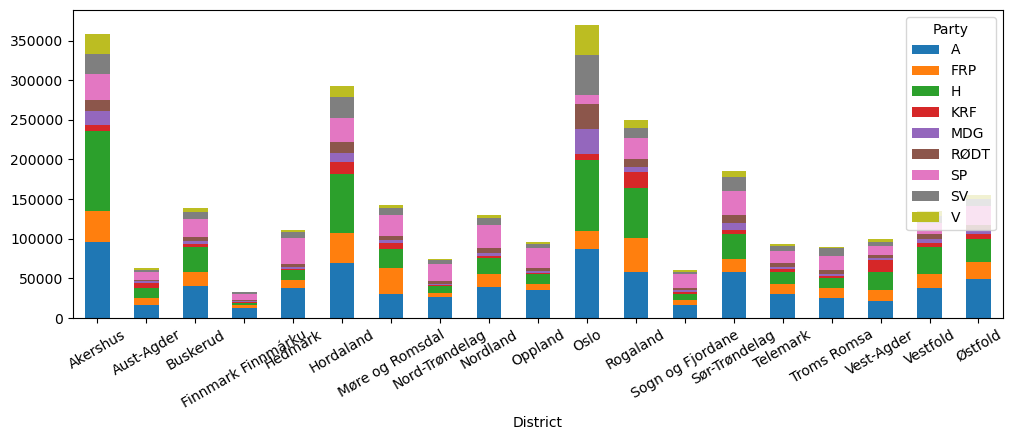

In [44]:
vd_dp_us.Votes.plot(kind='bar', stacked=True, figsize=(12, 4), rot=30);

- By unstacking differently, we can also see the distribution across districts for each party

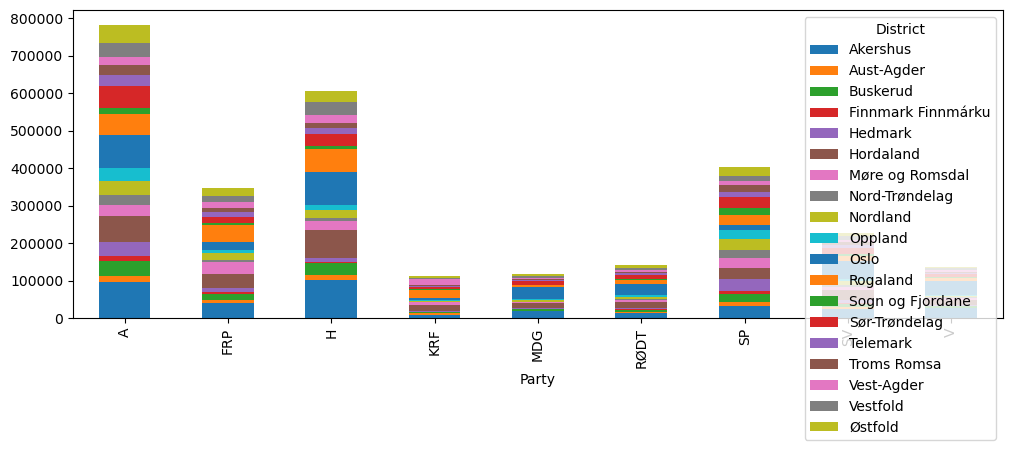

In [45]:
vd_dp.unstack(level=0).Votes.plot(kind='bar', stacked=True, figsize=(12, 4));

### Grouping

- Using grouping, we can aggregate data across a group
- Here we will aggregate the number of votes by party
- We first apply `groupby()` to perform the grouping, then an aggregation operation
- See also https://pandas.pydata.org/pandas-docs/stable/groupby.html

In [46]:
party_votes = vd.groupby('Party').sum()
party_votes

EarlyVotes  EDayVotes   Votes
Party                               
A          448001     335393  783394
FRP        182398     164076  346474
H          364352     242964  607316
KRF         64604      48740  113344
MDG         82235      35412  117647
RØDT        90313      50618  140931
SP         205534     197427  402961
SV         145819      82244  228063
V           80178      57255  137433

- We can compute the share of the total votes for each party and the percentage of early votes

In [47]:
total_votes = party_votes.Votes.sum()
party_votes['% Votes'] = party_votes.Votes / total_votes * 100
party_votes['% Early'] = party_votes.EarlyVotes / party_votes.Votes * 100

- We are most interested in the larger parties, so we sort
    - Here, we sort the dataframe in place instead of returning a new one

In [48]:
party_votes.sort_values(by='Votes', ascending=False, inplace=True)
party_votes.head()

EarlyVotes  EDayVotes   Votes    % Votes    % Early
Party                                                     
A          448001     335393  783394  27.224217  57.187188
H          364352     242964  607316  21.105220  59.993809
SP         205534     197427  402961  14.003551  51.005929
FRP        182398     164076  346474  12.040536  52.644066
SV         145819      82244  228063   7.925561  63.938035

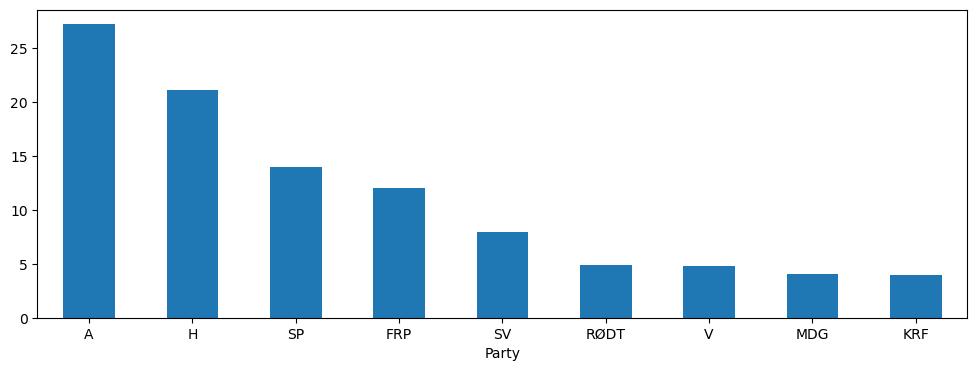

In [49]:
party_votes['% Votes'].plot(kind='bar', figsize=(12, 4), rot=0);

- `rot=0` turns the bar label horizonal
- We also look at the share of early voters

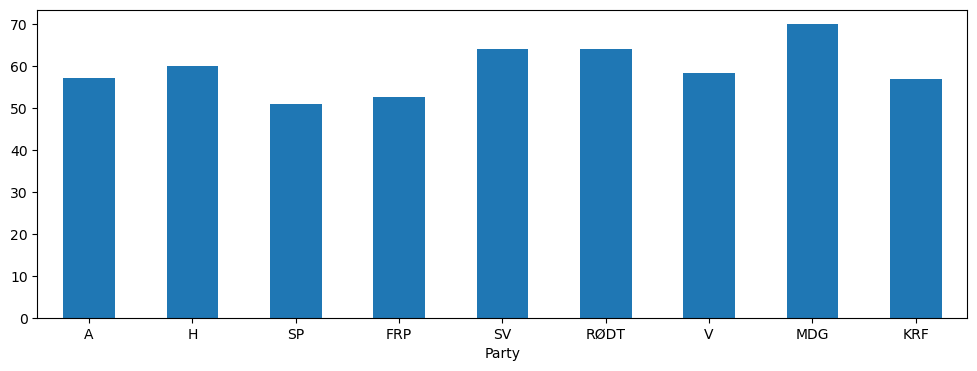

In [50]:
party_votes['% Early'].plot(kind='bar', figsize=(12, 4), rot=0);

--------------

# Version Control with Git and Gitlab

## Why use version control?

<table align="left">
    <tr align="left">
        <td>
            <ul>
                <li>Keep track of changing code
                <li>Test new ideas without breaking working code
                <li>Provide alternative versions of code
                <li>Localize where bugs were introduced
                <li>Collaborate with others
                <li>Document contributions
            </ul>
        </td>
        <td>
        <img src="http://www.phdcomics.com/comics/archive/phd101212s.gif" width=300>
        </td>
    </tr>
</table>

## What do we need?

- Version control software to manage our code
    - Today mostly [Git](https://en.wikipedia.org/wiki/Git)
    - Runs on your computer
    - You interact with `git` to register changes
    - Interaction either on command line or GUI (PyCharm)
- Server supporting Git repositories
    - Offered by many providers, e.g., Github, Gitlab, Atlassian (Bitbucket), ...
    - Companies and organisations may have internal servers, often based on Github or Gitlab software
    - By pushing code to a remote server, you
        - have and off-site backup
        - can interact with others
    - Providers offer many services around the code
        - code review tools
        - issue trackers
        - automated testing
        - wikis
        - project boards

## Resources around Git

- [Instructions for Working with Git and Gitlab (Canvas)](https://nmbu.instructure.com/courses/8544/pages/instructions-for-working-with-git-and-gitlab?module_item_id=194684)
    - Includes videos
    - Work through this in the exercise sessions in week 41 and 42
- [ProGit](https://git-scm.com/book/en/v2) by Scott Chacon
    - Free book
    - For INF200, Ch 1-3 are most relevant
    - Some information in the book may be a bit outdated since it is seven years old
- Videos about Git from the Git developer community: https://git-scm.com/videos
- Online tutorials by Atlassian (maker of BitBucket, a competitor to Github and GitLab):
    - https://www.atlassian.com/git/tutorials/what-is-version-control
    - https://www.atlassian.com/git/tutorials/source-code-management
    - https://www.atlassian.com/git/tutorials/what-is-git
    - https://www.atlassian.com/git/tutorials/why-git
- Learn Git Branching, an interactive tutorial.  It uses git commands on the command line, while we will mostly work through PyCharm. But knowing the command line approach never hurts: https://learngitbranching.js.org

## Version control concepts

### Local and centralized version control

<table align="left">
    <tr align="left">
        <td>
            <ul>
                <li>Local version control
                    <ul>
                        <li>On your computer only
                        <li>Changes are recorded by VC system
                        <li>You can go back to older versions of code
                        <li>By working with code at a specific version, you can be certain which code you executed to solve a problem
                        <li>No collaboration with others
                    </ul>
                 <li>Centralized version control
                     <ul>
                         <li>Changes are recorded on <strong>one</strong> central server
                         <li>Allows collaboration with others
                         <li>Changes can be recorded only while connected to server
                         <li>Problems if two developers change same file simultaneously
                         <li>Important examples: [CVS](https://en.wikipedia.org/wiki/Concurrent_Versions_System) and [Subversion (svn)](https://subversion.apache.org/)
                         <li>Now technologically outdated
                     </ul>
            </ul>
        </td>
        <td>
            <img src="https://git-scm.com/book/en/v2/images/local.png" width="600">
    <p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>
        </td>
        <td>
            <img src="https://git-scm.com/book/en/v2/images/centralized.png" width="600">
    <p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>
        </td>
    </tr>
</table>

### Distributed version control

<table align="left">
    <tr align="left">
        <td>
            <ul>
                <li>Changes are recorded locally on your computer
                <li>Works similar to local version control as long as you only work on you computer
                <li>Supports communicating with remote servers
                <li>You can <em>push</em> your changes to a server
                <li>You can <em>pull</em> changes from a server
                <li>VC software helps to <em>merge</em> changes by different contributors
                <li>Git is today the most used distributed version control software
                <li>Servers provided eg by Gitlab, Github, Atlassian, but also organisation-operated servers
            </ul>
        </td>
        <td>
            <img src="https://git-scm.com/book/en/v2/images/distributed.png" width="300">
    <p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>
        </td>
    </tr>
</table>

## Git Basics

### Terminology I

- **Repository**
    - A collection of folders and files managed by Git
    - Git stores all information about history in a special folder `.git`
    - The `.git` folder is sometimes also called the repository
    - **Do not touch the `.git` folder!**
- **Working directory**
    - Folder with files you work on, visible in Finder/Explorer
- **Cloning**
    - Copy an entire repository from a server to your computer
    - Usually done once
    - Automatically creates working directory with current version of project
- **Staging**
    - Tell Git which changes you want to register
- **Committing**
    - Tell Git to register (check in) changes in repository
    - A *commit* refers to all changes registered simultaneously
    - Each commit defines a *version* (also called *snapshot*)
    
<img src="https://git-scm.com/book/en/v2/images/snapshots.png" width=600>
<p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>

### Basic workflow

0. Clone repository (only once)
1. Make changes to code
2. Stage changes: decide what to check-in
3. Commit changes: check-in and provide short message on changes made
4. Continue with step 1

<img src="https://git-scm.com/book/en/v2/images/areas.png" width=600>
<p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>

### What is a commit?

- **Blob**
    - A localized change to a single file
    - Multiple changes to a single file may be separate blobs if they are far enough from each other in the file
- **Tree**
    - Collection of all blobs in a commit
- **Hash**
    - A unique digital fingerprint of each blob, tree and commit
- **Commit**
    - Tree with all changes checked in with this commit
    - Metadata
        - Information about author
        - Explanatory message about content of commit
        - Hash of single parent or both parents (previous commit(s))
        - Hash of commit itself
- Git history as a blockchain
    - By linking via hashes, Git builds a definite history
    - One cannot change earlier commits without breaking the chain

<table>
    <tr><td><img src="https://git-scm.com/book/en/v2/images/commit-and-tree.png" width=400></td>
        <td><img src="https://git-scm.com/book/en/v2/images/commits-and-parents.png" width=400></td>
    </tr>
    <tr><td><p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p></td></tr></table>



## Branches in Git

- Extremely powerful feature to work on code in a controlled way
- Changes made in a branch are kept separate from changes in other branches
    - You can try out new things in a branch
    - You can commit as many versions in a branch as you like
    - If your new ideas work out, you can integrate them
    - If they don't work out, you can just delete the branch
    - You can share branches with others to collaborate
- Special branch for "definite" version of project
    - Historically called `master`, today usually called `main`
    - Automatically created when you create a repository
    - Changes from successful branches get integrated into `main`    
<img src="https://git-scm.com/book/en/v2/images/basic-merging-2.png" width=600>
<p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>

### Terminology II

- **Branching**
    - Create a new branch
    - E.g., to fix a bug or develop a new feature
    - Usually want to ensure all changes are committed before creating a new branch
    - Each branch is a pointer to a specific commit
- **Checking out**
    - Switching content of working directory between branches
    - Usually want to ensure all changes are committed before checking out a different branch
- **HEAD**
    - A pointer to the current branch
    - Each new commit is added as a child of the commit HEAD points to
    - Upon commit, the current branch pointer is moved to the new commit
    
<table>
    <tr><td>Master checked out, new branch testing</td>
        <td>testing checked out</td>
        <td>New commit on testing</td>
    </tr>
    <tr>    
    <td><img src="https://git-scm.com/book/en/v2/images/head-to-master.png" width=200></td>
    <td><img src="https://git-scm.com/book/en/v2/images/head-to-testing.png" width=200></td>
    <td><img src="https://git-scm.com/book/en/v2/images/advance-testing.png" width=300></td></tr>
    <tr>
        <td>Master checked out</td>
        <td>New commit on master</td>
    </tr>
    <tr>
    <td><img src="https://git-scm.com/book/en/v2/images/checkout-master.png" width=300></td>
<td><img src="https://git-scm.com/book/en/v2/images/advance-master.png" width=300></td>
    <td><p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p></td>
    </tr>
    </table>

### Terminology III

- **Merging**
    - Combine changes made on different branches
        - from bug-fix branch into main
        - merge new feature into main
        - merge changes from remote server into your main
        - merge changes from main into a branch to keep branch up-to-date
    - Usually git handles necessary changes automatically
    - If possible, git performes *fast forward*: changes from merged branch just put at head of current branch
    - Otherwise, creates merge commit with two parents
- **Conflicts**
    - Sometimes, git cannot combine changes from two branches
    - Usually if different changes to the same line of code
    - Git flags a conflict
    - Programmer must resolve conflict manually and then commit
    - Tools such as PyCharm can help with conflict resolution
    - **NB:** Git can only detect conflicts in program text, not in program logic
    
 <img src="https://git-scm.com/book/en/v2/images/basic-merging-2.png" width=600>
<p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>

## Git with a remote server

### Terminology IV

<table>
<tr>
<td>
<ul>
<li> <strong>Git Server</strong>
<ul>
    <li> Any computer providing access to git repositories
    <li> E.g., Github, Gitlab, Atlassian (Bitbucket)
    <li> You can set up your own Git server if you like
</ul>
<li> <strong>Clone</strong>
<ul>
    <li> Copy repository from server to your machine
</ul>
<li> <strong>Fork</strong>
<ul>
    <li> Copy a repository, usually from a different user, on a server
    <li> See "Fork" buttons on Github or Gitlab
    <li> Not relevant for this course, but necessary if you want to contribute to a project
</ul>
<li> <strong>Remote</strong>
<ul>
    <li> A <em>remote</em> is a git server that you have told your local git repository about
    <li> When you clone a project from a server, that server is automatically registered as the remote <em>origin</em>
    <li> In basic git workflows, you only work with origin
</ul>
<li> <strong>Fetch</strong>
<ul>
    <li> Get information about all new changes available at a remote
    <li> Does not change your working directory
</ul>
<li> <strong>Pull</strong>
<ul>
    <li> Merge changes from remote branch into your working directory
</ul>
<li> <strong>Push</strong>
<ul>
    <li> Send your commits to remote server
    <li> Will fail if server has commits not yet in your history
<ul>
        <li> Need to pull first
</ul>
</ul>
</td>
<td><img src="https://git-scm.com/book/en/v2/images/distributed.png" width="300">
    <p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p></td>
</tr>
</table>

<table>
    <tr><td>Cloning from server</td><td>Local changes</td><td>Fetching remote changes</td></tr>
    <tr>
        <td><img src="https://git-scm.com/book/en/v2/images/remote-branches-1.png" width=300></td>
        <td><img src="https://git-scm.com/book/en/v2/images/remote-branches-2.png" width=300></td>
        <td><img src="https://git-scm.com/book/en/v2/images/remote-branches-3.png" width=300></td>
    </tr>
    </table>
   

## Git workflow for INF200

- See also "Small Team Workflow" in [Chacon & Straub (2014), Ch 5.2](https://git-scm.com/book/en/v2/Distributed-Git-Contributing-to-a-Project)
- Demonstration follows in class
- You will practice this workflow in the exercise sessions 

### Example with two developers: orange and green

<table>
    <tr><td>Green last pushed, Orange has local change</td>
        <td>Orange pulls and merges Green's changes from server</td>
        <td>Orange pushes merge result to server</td></tr>
    <tr>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-1.png" width=300></td>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-2.png" width=300></td>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-3.png" width=300></td>
    </tr>
    </table>
    <table>
    <tr>
    <td>Green commits to new branch (has not fetched)</td>
    <td>Green fetches from origin (does not pull or merge)</td>
    </tr>
    <tr>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-4.png" width=450></td>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-5.png" width=450></td>
    </tr>
    <tr>
    <td>Green merges issue54 into master</td>
    <td>Green pushes changes to origin</td>
    </tr>
    <tr>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-6.png" width=450></td>
        <td><img src="https://git-scm.com/book/en/v2/images/small-team-7.png" width=450></td>
    </tr>
    </table>

<p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>

### The same process over time

- John: Orange
- Jessica: Green

<img src="https://git-scm.com/book/en/v2/images/small-team-flow.png" width=400>

<p style="font-size:smaller">Chacon and Straub, <em>Pro Git</em>, 2 ed, 2014, under <a href=https://creativecommons.org/licenses/by-nc-sa/3.0/ target=_new>CC BY-NC-SA 3.0</a></p>